In [8]:
def exact_divisibility_two(x):
    d = 0
    while x%2 == 0:
        x /= 2
        d+=1
    return d

def generate_collatz_set(k, v1, n):
    collatz_set = []
    if n<1 or v1%2==0:
        return collatz_set
    vi = v1
    collatz_set.append(vi)
    for i in range(n-1):
        vi = k*vi+1
        while vi%2 == 0:
            vi /= 2
        if vi in collatz_set:
            return [] if len(collatz_set)<n else collatz_set
        elif vi == 1:
            #collatz_set.append(int(vi))
            return [] if len(collatz_set)<n else collatz_set
        else:
            collatz_set.append(int(vi))
    return collatz_set

def beta(integer_set, k):
    l = len(integer_set)
    if l == 0:
        return 1
    prod=1
    for i in range(l):
        element = integer_set[i]
        prod *= (1+1/(k*element))
    return prod

def engel(k,v1,n):
    return v1 if n==1 else (k/2)**(n-2)*(calculate_v2(v1, k)+1/(k-2))-1/(k-2)

def engel_beta(k,v1,n):
    collatz_set = generate_collatz_set(k, v1, n)
    l=len(collatz_set)
    if (l < n):
        return 1
    if (1 == n):
        return 1 + 1/(k*v1)
    v2 = collatz_set[1]
    b = 1 + 1/(k*v1) + (k*v1+1)/(k*(k-2)*v1*v2)*(1-(2/k)**(n-1))
    return b

def engel_beta_m(k,v1,n,m):
    collatz_set = generate_collatz_set(k, v1, n)
    l=len(collatz_set)
    if (l < n):
        return 1
    if (1 == n):
        return 1 + 1/(k*v1)
    alpha1 = m + 1
    b = 1 + 1/(k*v1) + 2**(alpha1)/(k*(k-2)*v1)*(1-(2/k)**(n-1))
    return b

def calculate_alpha(collatz_set, k):
    l = len(collatz_set)
    if l <= 1:
        return 0
    a = 0
    for i in range(l-1):
        vi = collatz_set[i]
        a += exact_divisibility_two(k*vi+1)
    return a

def calculate_v2(v1, k):
    temp = k*v1+1
    a1 = exact_divisibility_two(temp)
    return temp / 2**a1

def find_engel_expansions(k, n, start, stop):
    result = []
    for v1 in range(start, stop):
        e = engel(k, v1, n)
        if e.is_integer():
            col_set = generate_collatz_set(k, v1, n)
            if len(col_set) == n:
                result.append(col_set)
    return result

In [9]:
#print(find_engel_expansions(3, 7, 1, 9999))
#print(engel_beta(3,7,5))
#print(engel_beta(3,9,5))
k=3
colset = generate_collatz_set(k,7,5)
print("{0} {1} {2}".format(colset, beta(colset,k), calculate_alpha(colset, k)))
print(engel_beta_m(k,7,5,6))

[7, 11, 17, 13, 5] 1.203997648442093 7
5.938859494415049


In [10]:
import pandas as pd

print(engel_beta(3,661,4))
print(engel(3,31,5))
print(engel(5,67,7))

max_iter=40
k=3
data = []
for x in range(max_iter):
    for y in range(max_iter):
        v1 = 2*x+1
        n = y+1
        colset = generate_collatz_set(k, v1, n)
        b = beta(colset, k)
        eb = engel_beta(k, v1, n)
        str_colset = '[' + ' '.join(map(str, colset)) + ']'
        data.append([x, y, b, eb, v1, n, str_colset])

columns = ['v1', 'n', 'beta', 'engel_beta', 'v1', 'n', 'sequence']
df = pd.DataFrame(data, columns=columns)
#print(df.iloc[240:280,:])
df.to_csv('c:/temp/collatz_beta.csv', index=False)

1.0232158532713247
161.0
2082.9999999999995


In [11]:
import numpy as np

x = np.linspace(0, max_iter-1, max_iter)
y = np.linspace(0, max_iter-1, max_iter)
X, Y = np.meshgrid(x, y)
X = X.astype(int)
Y = Y.astype(int)
Z = np.zeros(shape=(max_iter, max_iter))
k = 3

def fn_plot_beta(x, y):
    v1 = 2*x+1
    n = y+1
    collatz_set = generate_collatz_set(k, v1, n)
    return float(beta(collatz_set, k))

def fn_plot_engel_beta(x, y):
    v1 = 2*x+1
    n = y+1
    return float(engel_beta(k,v1,n))

fn_vectorized_beta = np.vectorize(fn_plot_beta)
Z_beta = fn_vectorized_beta(X, Y)

fn_vectorized_engel_beta = np.vectorize(fn_plot_engel_beta)
Z_engel_beta = fn_vectorized_engel_beta(X, Y)

In [12]:
import plotly.graph_objects as go

fig_beta = go.Figure(data=[
    go.Surface(z=Z_beta, x=X, y=Y, showscale=False, opacity=0.9)
])
fig_beta.update_layout(title='Beta', autosize=True,
                  width=600, height=600,
                  margin=dict(l=65, r=50, b=65, t=90))
fig_beta.show()

fig_engel_beta = go.Figure(data=[
    go.Surface(z=Z_engel_beta, x=X, y=Y, showscale=False, opacity=0.9)
])
fig_engel_beta.update_layout(title='Engel Beta', autosize=True,
                  width=600, height=600,
                  margin=dict(l=65, r=50, b=65, t=90))
fig_engel_beta.show()

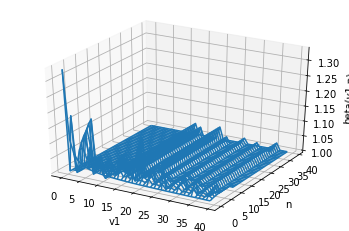

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_wireframe(X, Y, Z_engel_beta)
ax.set_xlabel('v1')
ax.set_ylabel('n')
ax.set_zlabel('beta(v1,n)')
plt.show()